# Sprint 19

## U-Net

### [Problem 1] Learning / Estimation

In [1]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...


In [1]:
!cd unet & python main.py

Epoch 1/1
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.

 37/300 [==>...........................] - ETA: 32:12 - loss: 0.7075 - acc: 0.7478

2022-02-05 21:40:27.537720: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2022-02-05 21:40:27.537781: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using TensorFlow backend.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)




 96/300 [========>.....................] - ETA: 22:23 - loss: 0.6976 - acc: 0.7682



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





2022-02-05 21:40:33.195751: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2022-02-05 21:40:33.199005: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2022-02-05 21:40:33.641959: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce GTX 960M major: 5 minor: 0 memoryClockRate(GHz): 1.176
pciBusID: 0000:01:00.0
2022-02-05 21:40:33.643880: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2022-02-05 21:40:33.645450: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cublas64_100.dll'; dlerror: cublas64_100.dll not found
2022-02-05 21:40

300/300 [==============================] - 1958s 7s/step - loss: 0.6909 - acc: 0.7771

Epoch 00001: loss improved from inf to 0.69094, saving model to unet_membrane.hdf5

30/30 [==============================] - 23s 762ms/step



  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\data.py:124: UserWarning: data/membrane/test\19_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\data.py:124: UserWarning: data/membrane/test\20_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\data.py:124: UserWarning: data/membrane/test\21_predict.png is a low contrast image
  io.imsave(os.path.join

In [2]:
import glob
dir_str = "unet/data/membrane/test"
imgs = glob.glob(dir_str + '/*' + '.png')

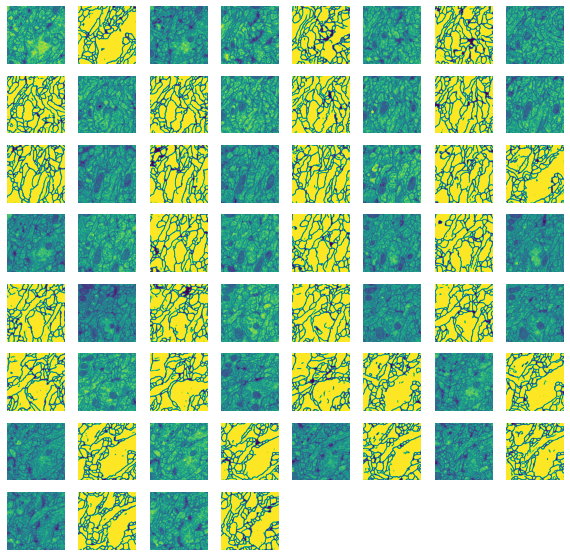

In [3]:
from matplotlib import pyplot as plt
import cv2
import re
from PIL import Image
import numpy as np

height = 256
width = 256
img_array = np.empty((0, height, width))
n_imgs = len(imgs)

plt.figure(figsize=(10, 10))
for itr, img in enumerate(imgs):
        img_tensor = Image.open(img)
        img_tensor = np.asarray(img_tensor)
        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
        img_tensor = img_tensor.reshape(1, height, width)
        img_array = np.append(img_array, img_tensor, axis=0)

for itr, img in enumerate(img_array):
    plt.subplot(int(np.sqrt(n_imgs))+1, int(np.sqrt(n_imgs))+1, itr+1)
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

In [8]:
from unet.model import *
from unet.data import *

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGen = trainGenerator(2, 'train', 'images', 'masks', data_gen_args, save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss', save_best_only=True)
model.fit_generator(myGen, steps_per_epoch=200, epochs=2, callbacks=[model_checkpoint])

Epoch 1/2
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
200/200 [==============================] - 1257s 6s/step - loss: 0.6644 - acc: 0.7451

Epoch 00001: loss improved from inf to 0.66444, saving model to unet_membrane.hdf5
Epoch 2/2
200/200 [==============================] - 1277s 6s/step - loss: 0.5806 - acc: 0.7351

Epoch 00002: loss improved from 0.66444 to 0.58063, saving model to unet_membrane.hdf5


In [13]:
t_list = glob.glob('test/images' + '/*' + ".png")

In [15]:
def testGenerator(test_path,num_image = 30,
                  target_size = (256,256),
                  flag_multi_class = False,
                  as_gray = True):
    for i in range(num_image):
        img = io.imread(os.path.join(t_list[i]),as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

In [17]:
testGene = testGenerator("test/images")
results = model.predict_generator(testGene, 30, verbose=1)
saveResult("test/results",results)

30/30 [==============================] - 19s 621ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\data.py:124: UserWarning: test/results\1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\data.py:124: UserWarning: test/results\2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\data.py:124: UserWarning: test/results\3_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range 

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\data.py:124: UserWarning: test/results\27_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\data.py:124: UserWarning: test/results\28_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Administrator\Desktop\diveintocode-ml\Sprint 19\unet\data.py:124: UserWarning: test/results\29_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Ran

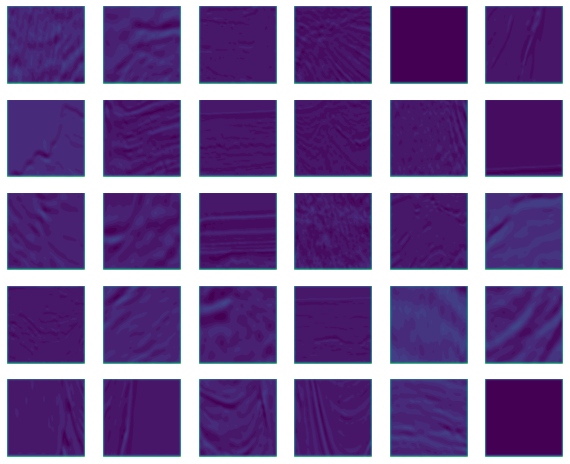

In [18]:
pre_list = glob.glob('test/results' + '/*' + ".png")

from matplotlib import pyplot as plt
import cv2
import re
from PIL import Image
import numpy as np

height = 256
width = 256
img_array = np.empty((0, height, width))
n_imgs = len(pre_list)

plt.figure(figsize=(10, 10))
for itr, img in enumerate(pre_list):
        img_tensor = Image.open(img)
        img_tensor = np.asarray(img_tensor)
        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
        img_tensor = img_tensor.reshape(1, height, width)
        img_array = np.append(img_array, img_tensor, axis=0)

for itr, img in enumerate(img_array):
    plt.subplot(int(np.sqrt(n_imgs))+1, int(np.sqrt(n_imgs))+1, itr+1)
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

### [Problem 2] Code reading

- U-Net is popular in resolving image segmentation task, i.e., partitioning a digital image into multiple image segments. Training strategy relied on the strong use of data augmentation.
- Model illustration: Figure 1 in the paper. Model implementation: `unet()` function in `model.py`
- Data augmentation is implemented in `data.py`:
    - `adjustData()` converts image to numerical data
    - `trainGenerator()` and `testGeneration()` are used to augment image for training and testing respectively